**auto regressive:**(time series analysis)
assumes current based on previous value
predicts
time series:(moving average)
if 0 completely ignoring the value.
other than ml
forecast information
auto regression same as rnn

Time series

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA# ar and ima
from statsmodels.tsa.stattools import adfuller#time series is stationary or not


load data

In [ ]:
matches=pd.read_csv("/content/drive/MyDrive/Copy of matches.csv")

In [ ]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matches.drop('method',axis=1,inplace=True)
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [ ]:
#handling missing values
matches['city'] = matches['city'].fillna(matches['venue'])
matches['player_of_match'] = matches['player_of_match'].fillna('unknown')
matches['winner'] = matches['winner'].fillna('unknown')
matches['target_runs'] = matches['target_runs'].fillna(matches['target_runs'].mean())
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['result_margin'] = matches['result_margin'].fillna(0)

In [ ]:
matches.isnull().sum()

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


Handling Duplicates

In [ ]:
#Handling duplicates in team
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans'}
matches.replace(to_replace=team_dup,inplace=True)
#Handling duplicates in city
city_dup={'Bengaluru':'Bangalore','Navi Mumbai':'Mumbai','Dubai International Cricket Stadium':'Dubai','Sharjah Cricket Stadium':'Sharjah'}
matches['city'].replace(to_replace=city_dup,inplace=True)
#Handling duplicates in venue
matches.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium',inplace=True)
matches.replace('Brabourne Stadium, Mumbai','Brabourne Stadium',inplace=True)
matches.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy',inplace=True)
matches.replace('Eden Gardens, Kolkata','Eden Gardens',inplace=True)
matches.replace('Wankhede Stadium, Mumbai','Wankhede Stadium',inplace=True)
matches.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
matches.replace('Zayed Cricket Stadium, Abu Dhabi','Sheikh Zayed Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk, Chennai, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)
matches.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium',inplace=True)
matches.replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Himachal Pradesh Cricket Association Stadium, Dharamsala','Himachal Pradesh Cricket Association Stadium',inplace=True)
matches.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',inplace=True)

<ipython-input-6-24148b9a6f2f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].replace(to_replace=city_dup,inplace=True)


In [ ]:
print(matches.venue.nunique())
print(matches.team1.nunique())
print(matches.city.nunique())

40
15
34


convert date col to date and time

In [ ]:
matches['date']=pd.to_datetime(matches["date"])
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [ ]:
#reshape and calculate team metrix
team_performance=matches.melt(
    id_vars=["id","season","date","winner","result","result_margin","target_runs"],
    value_vars=["team1","team2"],
    var_name="home_or_away",
    value_name="team"
)
team_performance["is_winner"]=(team_performance["team"]==team_performance["winner"]).astype(int)
team_performance["runs_scored"]=team_performance["target_runs"]
team_performance["runs_conceded"]=team_performance.groupby("id")["target_runs"].transform("sum")-team_performance["target_runs"]
team_performance.head()

,id,season,date,winner,result,result_margin,target_runs,home_or_away,team,is_winner,runs_scored,runs_conceded
0,335982,2007/08,2008-04-18,Kolkata Knight Riders,runs,140.0,223.0,team1,Royal Challengers Bangalore,0,223.0,223.0
1,335983,2007/08,2008-04-19,Chennai Super Kings,runs,33.0,241.0,team1,Kings XI Punjab,0,241.0,241.0
2,335984,2007/08,2008-04-19,Delhi Capitals,wickets,9.0,130.0,team1,Delhi Capitals,1,130.0,130.0
3,335985,2007/08,2008-04-20,Royal Challengers Bangalore,wickets,5.0,166.0,team1,Mumbai Indians,0,166.0,166.0
4,335986,2007/08,2008-04-20,Kolkata Knight Riders,wickets,5.0,111.0,team1,Kolkata Knight Riders,1,111.0,111.0


In [ ]:
#aggreated data for each team
team_performance_agg =team_performance.groupby(["team" ,"date"]).agg({
    "is_winner":"sum",
    "runs_scored":"sum",
    "runs_conceded":"sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] =team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]
team_performance_agg

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
0,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
1,Royal Challengers Bangalore,2008-04-18,0,223.0,223.0,0.0
2,Chennai Super Kings,2008-04-19,1,241.0,241.0,0.0
3,Kings XI Punjab,2008-04-19,0,241.0,241.0,0.0
4,Delhi Capitals,2008-04-19,1,130.0,130.0,0.0
...,...,...,...,...,...,...
2185,Royal Challengers Bangalore,2024-05-22,0,173.0,173.0,0.0
2186,Rajasthan Royals,2024-05-24,0,176.0,176.0,0.0
2187,Sunrisers Hyderabad,2024-05-24,1,176.0,176.0,0.0
2188,Kolkata Knight Riders,2024-05-26,1,114.0,114.0,0.0


In [ ]:
team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] ==team_name]
team_data

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
0,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
9,Kolkata Knight Riders,2008-04-20,1,111.0,111.0,0.0
23,Kolkata Knight Riders,2008-04-26,0,148.0,148.0,0.0
30,Kolkata Knight Riders,2008-04-29,0,138.0,138.0,0.0
37,Kolkata Knight Riders,2008-05-01,0,197.0,197.0,0.0
...,...,...,...,...,...,...
2149,Kolkata Knight Riders,2024-05-03,1,170.0,170.0,0.0
2152,Kolkata Knight Riders,2024-05-05,1,236.0,236.0,0.0
2167,Kolkata Knight Riders,2024-05-11,1,158.0,158.0,0.0
2182,Kolkata Knight Riders,2024-05-21,1,160.0,160.0,0.0


In [ ]:
team_data = team_data.sort_values("date")
team_data.set_index("date",inplace=True)
team_data

,team,is_winner,runs_scored,runs_conceded,net_run_rate
date,,,,,
2008-04-18,Kolkata Knight Riders,1,223.0,223.0,0.0
2008-04-20,Kolkata Knight Riders,1,111.0,111.0,0.0
2008-04-26,Kolkata Knight Riders,0,148.0,148.0,0.0
2008-04-29,Kolkata Knight Riders,0,138.0,138.0,0.0
2008-05-01,Kolkata Knight Riders,0,197.0,197.0,0.0
...,...,...,...,...,...
2024-05-03,Kolkata Knight Riders,1,170.0,170.0,0.0
2024-05-05,Kolkata Knight Riders,1,236.0,236.0,0.0
2024-05-11,Kolkata Knight Riders,1,158.0,158.0,0.0


create virtual environment

In [ ]:
#stationary check read abt adfuller like the range -ve,0,+ve
time_series=team_data['runs_scored']
adf_result=adfuller(time_series)
print("ADF statistic", adf_result[0])
print("p value", adf_result[1])
if adf_result[1]>0.05:
  print("not stat")

ADF statistic -7.214074913565808
p value 2.1963196715516396e-10


In [ ]:
if adf_result[1]>0.05:
  time_series_dif=time_series.diff().dropna()
else:
  time_series_dif=time_series


In [ ]:
train_size=int(len(time_series_dif)*0.8)
train,test=time_series_dif[:train_size],time_series_dif[train_size:]

In [ ]:
model=ARIMA(train,order=(1,1,1)) #(1,1,1) performance ----- 10 matches he is gettibg more score in first 8 but not in last 2 back
fitted_model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast=fitted_model.forecast(steps=len(test))
forecast.index=test.index
forecast.head(5)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
date,
2021-09-23,160.975878
2021-09-26,166.173245
2021-09-28,166.570630
2021-10-01,166.601014
2021-10-03,166.603337


In [ ]:
actual_runs=test.values
forecast_runs=forecast.values
mae=np.mean(np.abs(actual_runs-forecast_runs))
print("Mean absolute error",mae)
rmse=np.sqrt(np.mean((actual_runs-forecast_runs)**2))
print("Root mean squared error",rmse)

Mean absolute error 28.84228337144472
Root mean squared error 37.5213765172496


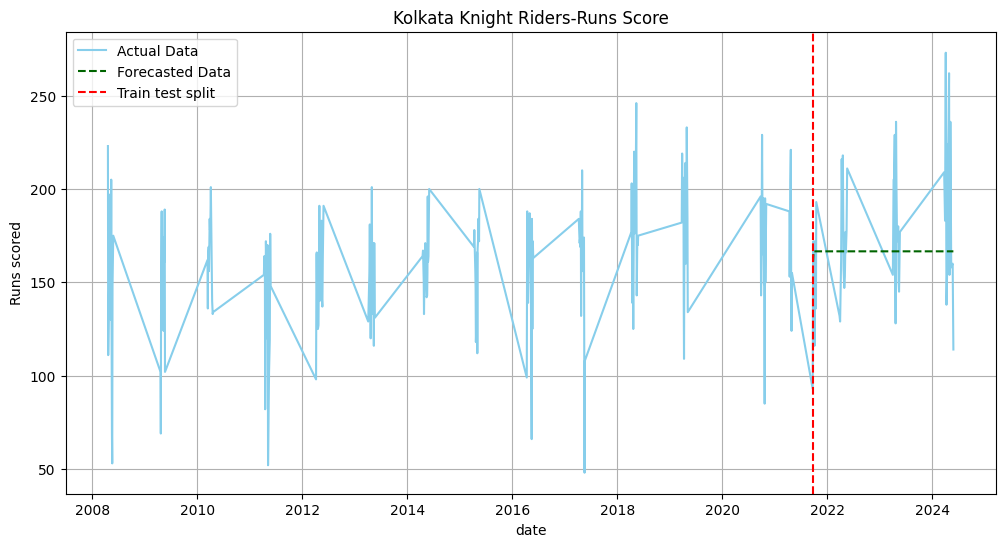

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(time_series_dif,label="Actual Data",color='skyblue')
plt.plot(forecast,label="Forecasted Data",color='darkgreen',linestyle="--")
plt.axvline(x=test.index[0],color='red',linestyle="--",label="Train test split")
plt.title(f"{team_name}-Runs Score")
plt.xlabel("date")
plt.ylabel("Runs scored")
plt.legend()
plt.grid()

Load deliveries data


In [ ]:
deliveries=pd.read_csv("/content/drive/MyDrive/Copy of deliveries.csv")

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
deliveries.sample(20)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
105826,734025,1,Kings XI Punjab,Mumbai Indians,6,6,SE Marsh,S Gopal,M Vohra,2,0,2,NaN,0,NaN,NaN,NaN
176664,1178425,2,Delhi Capitals,Chennai Super Kings,16,1,A Mishra,Imran Tahir,TA Boult,0,0,0,NaN,0,NaN,NaN,NaN
39800,419158,1,Rajasthan Royals,Kolkata Knight Riders,16,3,P Dogra,LR Shukla,FY Fazal,3,0,3,NaN,0,NaN,NaN,NaN
165215,1175358,1,Delhi Capitals,Mumbai Indians,1,5,SS Iyer,MJ McClenaghan,S Dhawan,1,0,1,NaN,0,NaN,NaN,NaN
34919,419138,1,Mumbai Indians,Deccan Chargers,5,4,SR Tendulkar,A Symonds,S Dhawan,0,0,0,NaN,0,NaN,NaN,NaN
169648,1178396,1,Rajasthan Royals,Kolkata Knight Riders,2,1,SPD Smith,PP Chawla,JC Buttler,1,0,1,NaN,0,NaN,NaN,NaN
92627,598065,2,Rajasthan Royals,Sunrisers Hyderabad,0,5,AM Rahane,DW Steyn,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
145071,1082627,2,Kolkata Knight Riders,Sunrisers Hyderabad,14,2,YK Pathan,S Kaul,SP Jackson,2,0,2,NaN,0,NaN,NaN,NaN
115901,829765,2,Kolkata Knight Riders,Chennai Super Kings,7,5,YK Pathan,R Ashwin,SA Yadav,0,0,0,NaN,0,NaN,NaN,NaN
241481,1359539,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,HC Brook,HV Patel,H Klaasen,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
deliveries.batter.unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
#Handling duplicates in team
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans'}
deliveries.replace(to_replace=team_dup,inplace=True)

In [ ]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
vkohli=deliveries[deliveries.batter=="V Kohli"]
vkohli_score=vkohli.groupby('match_id')['batsman_runs'].sum().reset_index()
vkohli_score_sub=vkohli_score.head(239)
vkohli_score_sub

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
234,1426263,3
235,1426268,42
236,1426274,18
237,1426279,51


In [ ]:
#preparing data
vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))
vkohli_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_sub["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

<ipython-input-30-f596f113d3f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))


239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


In [ ]:
batter=deliveries.groupby(['match_id','batter']).agg({'batsman_runs':'sum'}).reset_index()
batter_scores=batter.groupby('batter')['batsman_runs'].sum().reset_index()
batter_scores=batter_scores.sort_values(by="batsman_runs",ascending=False)
top_batter_scores=batter_scores.head(10)
print(top_batter_scores)
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  print(score)



             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843
V Kohli
       match_id   batter  batsman_runs
13       335982  V Kohli             1
56       335985  V Kohli            23
168      335992  V Kohli            13
224      335996  V Kohli            12
252      335998  V Kohli             1
...         ...      ...           ...
16197   1426290  V Kohli            42
16300   1426296  V Kohli            92
16367   1426300  V Kohli            27
16434   1426306  V Kohli            47
16479   1426310  V Kohli            33

[244 rows x 3 columns]
S Dhawan
       match_id    batter  batsman_runs
35       335984  S Dhawan            52
96       335988  S Dhawan            

Text(0, 0.5, 'scores')

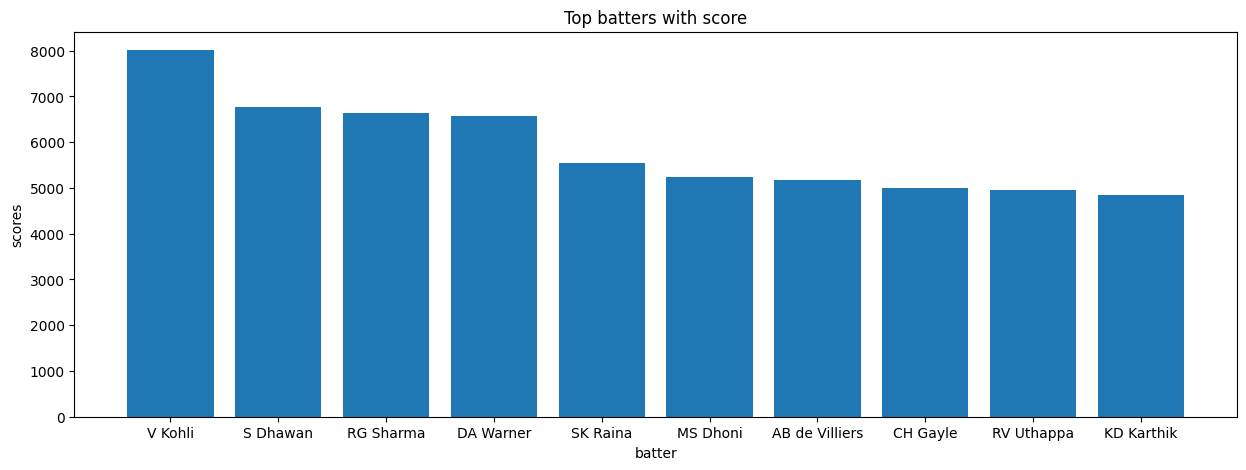

In [ ]:
player=top_batter_scores['batter']
scores=top_batter_scores['batsman_runs']
fig = plt.figure(figsize = (15, 5))
plt.bar(player,scores)
plt.title('Top batters with score')
plt.xlabel('batter')
plt.ylabel('scores')

In [ ]:
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  #preparing data
  top_batter_score=score.head(239)
  top_batter_score["match_number"]=range(len(top_batter_score))
  top_batter_score.set_index("match_number",inplace=True)
  model=ARIMA(top_batter_score["batsman_runs"],order=(1,1,1))
  model_fit=model.fit()
  forecast=model_fit.forecast(steps=5)
  print(forecast)




V Kohli


<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64
S Dhawan


<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


221    34.077027
222    32.753423
223    32.840684
224    32.834931
225    32.835310
Name: predicted_mean, dtype: float64
RG Sharma


<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


239    26.263767
240    26.226524
241    26.231782
242    26.231040
243    26.231145
Name: predicted_mean, dtype: float64
DA Warner


<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


184    30.375157
185    29.294774
186    29.334510
187    29.333048
188    29.333102
Name: predicted_mean, dtype: float64
SK Raina


<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


200    26.396030
201    25.281171
202    25.413451
203    25.397756
204    25.399618
Name: predicted_mean, dtype: float64
MS Dhoni
228    14.177092
229    14.334177
230    14.331897
231    14.331930
232    14.331929
Name: predicted_mean, dtype: float64
AB de Villiers


<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


170    32.171063
171    30.361837
172    30.516449
173    30.503236
174    30.504366
Name: predicted_mean, dtype: float64
CH Gayle
141    31.122217
142    29.325195
143    29.513797
144    29.494003
145    29.496080
Name: predicted_mean, dtype: float64
RV Uthappa
197    21.230932
198    21.476908
199    21.479899
200    21.479935
201    21.479936
Name: predicted_mean, dtype: float64
KD Karthik


<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
<ipython-input-50-b81d5205a4f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

233    20.803250
234    20.558832
235    20.564926
236    20.564774
237    20.564778
Name: predicted_mean, dtype: float64


In [ ]:
#preparing data
dhoni=deliveries[deliveries.batter=="MS Dhoni"]
dhoni_score=dhoni.groupby('match_id')['batsman_runs'].sum().reset_index()
print(dhoni_score)
dhoni_score_sub=dhoni_score.head(239)
dhoni_score_sub
dhoni_score_sub["match_number"]=range(len(dhoni_score_sub))
dhoni_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_sub["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

     match_id  batsman_runs
0      335983             2
1      335989            30
2      335993            43
3      335996            65
4      336001            32
..        ...           ...
223   1426284             5
224   1426287            14
225   1426291             0
226   1426297            26
227   1426306            25

[228 rows x 2 columns]
228    14.177092
229    14.334177
230    14.331897
231    14.331930
232    14.331929
Name: predicted_mean, dtype: float64


<ipython-input-49-f907b4079b3d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhoni_score_sub["match_number"]=range(len(dhoni_score_sub))


In [ ]:
bowler_data = deliveries[['match_id', 'bowler', 'is_wicket', 'total_runs']]


performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

print(performance)

top_bowler = 'YS Chahal'
bowler_timeseries = performance[performance['bowler'] == top_bowler].set_index('match_id')['wickets']
print(bowler_timeseries)

bowler_timeseries = bowler_timeseries.sort_index()

       match_id         bowler  wickets  runs_conceded
0        335982      AA Noffke        1             41
1        335982     AB Agarkar        3             25
2        335982       AB Dinda        2              9
3        335982       CL White        0             24
4        335982       I Sharma        1             13
...         ...            ...      ...            ...
12973   1426312     PJ Cummins        1             18
12974   1426312      SP Narine        1             20
12975   1426312  Shahbaz Ahmed        1             28
12976   1426312    T Natarajan        0             29
12977   1426312       VG Arora        1             26

[12978 rows x 4 columns]
match_id
598029     0
729281     1
729287     2
729299     1
729305     1
          ..
1426294    1
1426299    1
1426303    2
1426310    1
1426311    0
Name: wickets, Length: 159, dtype: int64


In [ ]:
model = ARIMA(bowler_timeseries, order=(2, 1, 2))
model_fit = model.fit()

forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

In [ ]:
print(forecast)

159    1.005454
160    1.437802
161    1.202628
162    1.464834
163    1.206342
164    1.465336
165    1.206418
166    1.465339
167    1.206425
168    1.465333
Name: predicted_mean, dtype: float64


In [ ]:
bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
top_bowl=bowlers.sort_values(by="wickets",ascending=False)
top_bowlers=top_bowl.head(10)
top_bowlers

,bowler,wickets
524,YS Chahal,213
119,DJ Bravo,207
348,PP Chawla,201
446,SP Narine,200
355,R Ashwin,198
71,B Kumar,195
438,SL Malinga,188
8,A Mishra,183
193,JJ Bumrah,182
373,RA Jadeja,169


In [ ]:
for i in range(len(top_bowlers)):
  bowler=top_bowlers.iloc[i]["bowler"]
  print(bowler)
  bscore=performance[performance['bowler']==bowler]
  print(bscore)
  top_bowler_score=bscore.head(239)
  top_bowler_score["match_number"]=range(len(top_bowler_score))
  top_bowler_score.set_index("match_number",inplace=True)
  model=ARIMA(top_bowler_score["wickets"],order=(2,1,2))
  model_fit=model.fit()
  forecast=model_fit.forecast(steps=5)
  print(forecast)




YS Chahal
       match_id     bowler  wickets  runs_conceded
4236     598029  YS Chahal        0             35
4782     729281  YS Chahal        1             18
4816     729287  YS Chahal        2             17
4889     729299  YS Chahal        1             26
4923     729305  YS Chahal        1             17
...         ...        ...      ...            ...
12793   1426294  YS Chahal        1             48
12851   1426299  YS Chahal        1             22
12890   1426303  YS Chahal        2             31
12952   1426310  YS Chahal        1             43
12965   1426311  YS Chahal        0             34

[159 rows x 4 columns]


<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))


159    1.005454
160    1.437802
161    1.202628
162    1.464834
163    1.206342
Name: predicted_mean, dtype: float64
DJ Bravo
       match_id    bowler  wickets  runs_conceded
84       335989  DJ Bravo        0             37
110      335991  DJ Bravo        0             27
146      335994  DJ Bravo        0             31
182      335997  DJ Bravo        1             25
267      336004  DJ Bravo        1             29
...         ...       ...      ...            ...
10698   1304075  DJ Bravo        3             23
10742   1304079  DJ Bravo        2             38
10798   1304084  DJ Bravo        3             42
10997   1304101  DJ Bravo        2             25
11040   1304105  DJ Bravo        0             16

[158 rows x 4 columns]
158    1.123336
159    1.080509
160    1.290551
161    1.263417
162    1.304446
Name: predicted_mean, dtype: float64
PP Chawla
       match_id     bowler  wickets  runs_conceded
20       335983  PP Chawla        0             19
63       335987  PP C

<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


191    0.976358
192    0.955228
193    1.148731
194    0.972775
195    1.117782
Name: predicted_mean, dtype: float64
SP Narine
       match_id     bowler  wickets  runs_conceded
3080     548312  SP Narine        0             29
3174     548320  SP Narine        1             22
3209     548323  SP Narine        5             20
3265     548328  SP Narine        2             24
3348     548335  SP Narine        2             27
...         ...        ...      ...            ...
12733   1426289  SP Narine        2             22
12767   1426292  SP Narine        1             22
12839   1426298  SP Narine        1             21
12938   1426309  SP Narine        2             40
12974   1426312  SP Narine        1             20

[175 rows x 4 columns]


<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))


175    1.036566
176    1.181101
177    1.173002
178    1.151011
179    1.152631
Name: predicted_mean, dtype: float64
R Ashwin
       match_id    bowler  wickets  runs_conceded
1330     392234  R Ashwin        2             14
1452     419110  R Ashwin        2             28
1492     419113  R Ashwin        1             22
1523     419116  R Ashwin        1             41
1583     419121  R Ashwin        0             33
...         ...       ...      ...            ...
12788   1426294  R Ashwin        3             24
12844   1426299  R Ashwin        2             35
12885   1426303  R Ashwin        0             31
12948   1426310  R Ashwin        2             19
12960   1426311  R Ashwin        0             43

[208 rows x 4 columns]


<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))


208    0.829370
209    0.864865
210    0.906687
211    0.877625
212    0.903352
Name: predicted_mean, dtype: float64
B Kumar
       match_id   bowler  wickets  runs_conceded
2718     501248  B Kumar        2             15
2742     501250  B Kumar        0             24
2848     501259  B Kumar        0             10
2882     501262  B Kumar        1             19
3022     548308  B Kumar        0             13
...         ...      ...      ...            ...
12795   1426295  B Kumar        2             13
12920   1426307  B Kumar        0             37
12932   1426309  B Kumar        0             32
12957   1426311  B Kumar        0             33
12968   1426312  B Kumar        0             25

[176 rows x 4 columns]
176    0.877525
177    0.874279
178    0.911221
179    0.883362
180    0.905728
Name: predicted_mean, dtype: float64
SL Malinga


<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))
<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))


      match_id      bowler  wickets  runs_conceded
692     392181  SL Malinga        3             20
813     392192  SL Malinga        3             24
863     392197  SL Malinga        3             11
897     392200  SL Malinga        2             16
939     392203  SL Malinga        1             23
...        ...         ...      ...            ...
8828   1178422  SL Malinga        0             48
8871   1178426  SL Malinga        0             44
8929   1178431  SL Malinga        3             36
8941   1181764  SL Malinga        0             27
8975   1181768  SL Malinga        2             49

[122 rows x 4 columns]
122    1.581432
123    1.518914
124    1.564134
125    1.522899
126    1.560225
Name: predicted_mean, dtype: float64
A Mishra
       match_id    bowler  wickets  runs_conceded
396      336015  A Mishra        2             27
419      336017  A Mishra        0             14
456      336020  A Mishra        5             17
476      336022  A Mishra        1    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))


162    1.045904
163    1.048600
164    1.050283
165    1.050112
166    1.050221
Name: predicted_mean, dtype: float64
JJ Bumrah
       match_id     bowler  wickets  runs_conceded
3886     597999  JJ Bumrah        3             36
4172     598024  JJ Bumrah        0             38
4811     729287  JJ Bumrah        0             14
5009     733973  JJ Bumrah        0             25
5066     733983  JJ Bumrah        2             23
...         ...        ...      ...            ...
12630   1426281  JJ Bumrah        1             36
12690   1426286  JJ Bumrah        0             17
12728   1426289  JJ Bumrah        3             18
12774   1426293  JJ Bumrah        1             23
12835   1426298  JJ Bumrah        3             40

[133 rows x 4 columns]
133    0.997069
134    1.919465
135    1.140515
136    1.836433
137    1.212461
Name: predicted_mean, dtype: float64
RA Jadeja
       match_id     bowler  wickets  runs_conceded
493      336023  RA Jadeja        0             21
657     

<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))
<ipython-input-15-7477c56b0402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowler_score["match_number"]=range(len(top_bowler_score))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autor

211    0.950512
212    0.729462
213    0.858578
214    0.753210
215    0.843794
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'wickets')

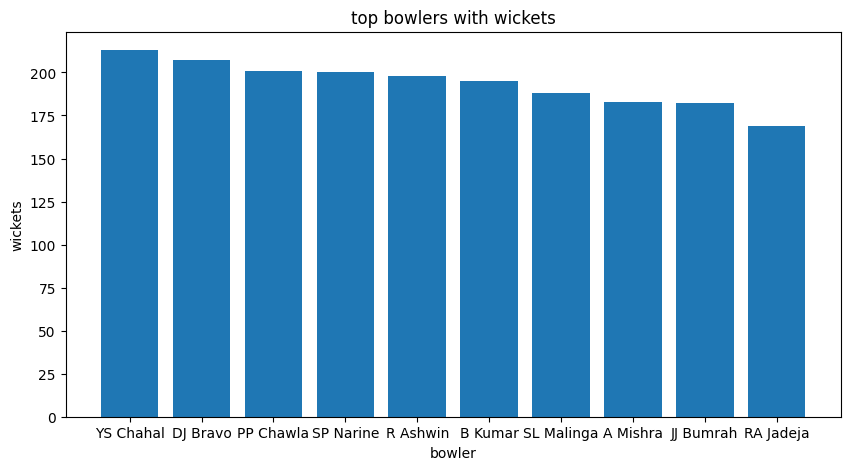

In [ ]:
bowler=top_bowlers['bowler']
scores=top_bowlers['wickets']
fig = plt.figure(figsize = (10, 5))
plt.bar(bowler,scores)
plt.title('top bowlers with wickets')
plt.xlabel('bowler')
plt.ylabel('wickets')